In [1]:
import numpy as np
from numpy import loadtxt
from astropy.io import fits
import scipy.constants as cnt
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = (10 , 5)

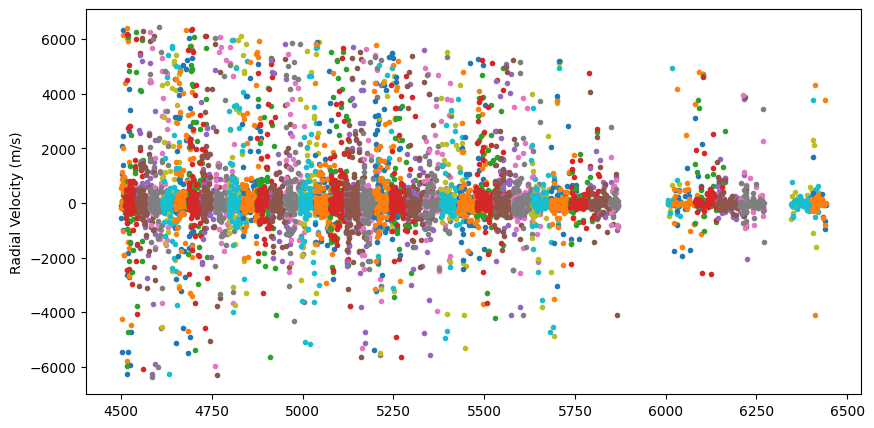

In [3]:
filtro = fits.getdata("data/ESPRESSO_G9.fits")
ori_lambda = filtro["lambda"]
ori_contrast = filtro["contrast"]

Lref = np.zeros(0)

numbers = np.arange(51,119) # array with the numbers used to access the files
n2 = np.arange(121,131)
numbers = np.append(numbers,n2)
n3 = np.arange(133,137)
numbers = np.append(numbers,n3)

N = len(numbers) 

data = np.zeros([N,171]) # empty matrix to store the fitted values of the wavelenghts
# the previous matrix has 27 columns because it is the maximum value of wavelenghts found
RV_matrix = np.zeros([N,171]) # empty matrix to store the RV values for each wavelenght
RV = np.zeros(0) # empty array to store the RV values
uncert_matrix = np.zeros([N,171])
uncert = np.zeros(0)
wave = np.zeros(0)
contrast = np.zeros(0)

for i,n in enumerate(numbers):
    
    info=loadtxt('data/data_5/{}.ares'.format(n),float) # loads the file with the data
    
    if np.ndim(info)!=1:
        fit=info[:,8]
        ref=info[:,0]
        err=info[:,9]
        M=len(fit)
        
    else:
        fit=info[8]
        ref=info[0]
        err=[9]
        M=1
        
    data[i,:M]=fit #stores the data for each document in the data matrix 
    wave = np.append(wave,data[i,:M])
    
    # this lines identify the lines that should be used from the original line data
    distances = np.abs(ori_lambda[:, np.newaxis] - ref)
    closest_indices = np.argmin(distances, axis=0)
    ref = ori_lambda[closest_indices]
    contrast = np.append(contrast,ori_contrast[closest_indices])
    
    RV_matrix[i,:M] = (fit - ref) / ref * cnt.c # calculates the values of RV and stores them in the RV_matrix
    RV = np.append(RV,RV_matrix[i,:M]) # stores the values in the RV array
    uncert_matrix[i,:M] = err / ref *cnt.c
    uncert = np.append(uncert,uncert_matrix[i,:M])

    Lref = np.append(Lref,ref) #MUDANÇA
    
    plt.plot(ref,RV_matrix[i,:M],'.') # plots the graphic
    
N_dim_3741 = np.zeros(3,dtype=int) # array to store the number of lines in the beguining and after removing outliers
N_dim_3741[0] = len(RV)

uncert_3741 = uncert
wave_3741 = wave

ARES_RV = -16600
CCF = -16646.1
    
plt.ylabel('Radial Velocity (m/s)')
plt.show()

In [4]:
np.set_printoptions(linewidth=150) #visualizar matrizes melhor

lambdaref = sorted(set(Lref)) #Sorted organiza numericamente e set remove cópias
TotData = np.empty((len(lambdaref),4), dtype = object)
TotData[:,0] = lambdaref
for i in range(len(lambdaref)):
    for j in range(1,4):
        TotData[i, j] = np.array([])  # or np.empty((0,)) if you prefer

index = {}

for i in range(N):
    for j in range(171):
        if data[i,j] != 0:
            index[data[i,j]] = (i,j) #|Indexa os lambda obs com a sua linha e coluna
        else:
            pass
# Praticamente regista todos os indices onde a matriz é não nula conjunto com os lambda obs
sorted_index = sorted(index.keys()) #| Retorna todos os valores de data (os lambda obs) e mete-os num único sítio por ordem crescente. É uma array de lambda obs

for i in range(len(lambdaref)) :
    for j in range(len(sorted_index)) :
        if abs(sorted_index[j] - lambdaref[i]) <= 0.1 :
            (a,b) = index.get(sorted_index[j])
            TotData[i,1] = np.append(TotData[i,1], sorted_index[j])
            TotData[i,2] = np.append(TotData[i,2], uncert_matrix[a,b])
            TotData[i,3] = np.append(TotData[i,3], RV_matrix[a,b])

TotData5 = object
TotData5 = TotData
TotData5

array([[np.float64(4500.28716486), array([4500.27903, 4500.29554]), array([757.42727577, 554.91373854]), array([-541.91423474,  557.92079808])],
       [np.float64(4500.63332934), array([4500.63043, 4500.63146]), array([175.85349243, 163.19736987]), array([-193.12843362, -124.51892714])],
       [np.float64(4501.09879982), array([4501.09678, 4501.09978]), array([256.42648932, 733.97919799]), array([-134.52866277,   65.28418603])],
       ...,
       [np.float64(6437.69058201), array([6437.67353, 6437.67621]), array([52.62220562, 56.34767151]), array([-794.08351902, -669.2804119 ])],
       [np.float64(6439.0829297), array([6439.06237, 6439.16357]), array([480.48118037, 394.81399317]), array([-957.22373297, 3754.47156291])],
       [np.float64(6440.94261029), array([6440.94112, 6440.94255]), array([64.23183951, 65.16273574]), array([-69.36526671,  -2.80618667])]],
      shape=(3261, 4), dtype=object)

In [5]:
np.save('TotData5.npy',TotData5)

# 229

In [3]:
RV_229 = np.zeros(0)
uncert_229 = np.zeros(0)

for i, c in enumerate(contrast):
    if c >= 0.55:
        RV_229 = np.append(RV_229,RV[i])
        uncert_229 = np.append(uncert_229,uncert[i])
    else:
        pass
    
N_dim_229 = np.zeros(3,dtype=int)
N_dim_229[0] = len(RV_229)

mean = 112.54233 m/s ; standard deviation / √N = 52.47616 m/s
weighted mean = -54.39549 m/s ; weighted standard deviation / √N = 0.53593 m/s
median = -30.78595 m/s


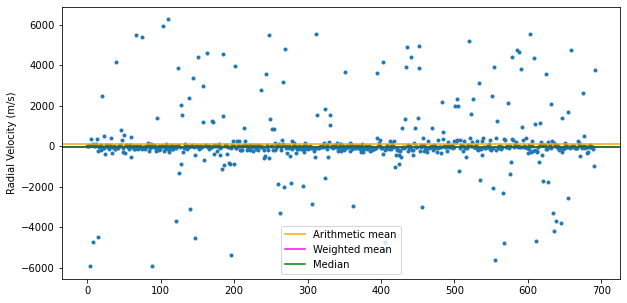

mean = -16487.45767 m/s ; standard deviation / √N = 52.47616 m/s
weighted mean = -16654.39549 m/s ; weighted standard deviation / √N = 0.53593 m/s
median = -16630.78595 m/s


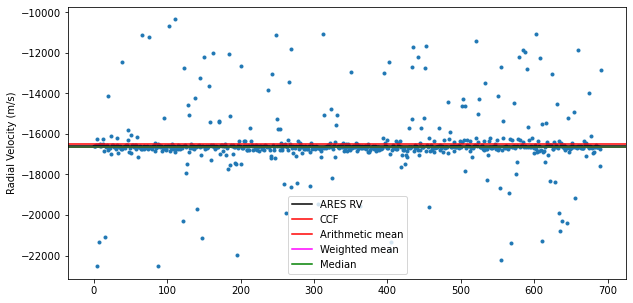

In [4]:
std = np.std(RV_229) # standard deviation of the values of the RVs
mean = np.mean(RV_229) # mean of the values of the RVs

wmean = mean
wstd = 0
f0 = 2e-3
sigma = (RV_229 - wmean) / uncert_229
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    wmean = (RV_229 * pi * uncert_229 ** (-2)).sum() / (pi * uncert_229 ** (-2)).sum()
    wstd = np.sqrt(1 / (pi * uncert_229 ** (-2)).sum())
    sigma = (RV_229 - wmean) / uncert_229
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
median = np.median(RV_229) # median of the values of the RVs

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean,std / np.sqrt(len(RV_229))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean,wstd / np.sqrt(len(RV_229))))
print('median = {:.5f} m/s'.format(median))

plt.plot(RV_229,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean + ARES_RV,std / np.sqrt(len(RV_229))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean + ARES_RV,wstd / np.sqrt(len(RV_229))))
print('median = {:.5f} m/s'.format(median + ARES_RV))

plt.plot(RV_229 + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(mean + ARES_RV, label= 'Arithmetic mean', color ='red')
plt.axhline(wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Removing outliers

mean = 8.04625 m/s ; standard deviation / √N = 21.45781 m/s
weighted mean = 0.86286 m/s ; weighted standard deviation / √N = 0.56806 m/s
median = -32.67407 m/s


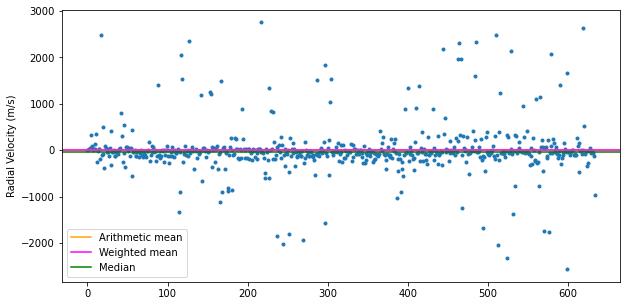

mean = -16591.95375 m/s ; standard deviation / √N = 21.45781 m/s
weighted mean = -16599.13714 m/s ; weighted standard deviation / √N = 0.56806 m/s
median = -16632.67407 m/s


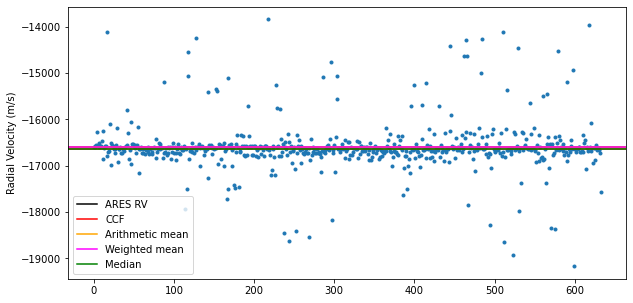

In [5]:
corrRV = np.zeros(0)
corr_uncert = np.zeros(0)

for i , rv in enumerate(RV_229): # this cycle chooses the values between the mean and standard deviation
    if mean - 2*std < rv < mean + 2*std:
        corrRV = np.append(corrRV,rv)
        corr_uncert = np.append(corr_uncert,uncert_229[i])
        
corr_mean = np.mean(corrRV)
corr_std = np.std(corrRV)

corr_wmean = corr_mean
corr_wstd = 0
f0 = 2e-3
sigma = (corrRV - corr_wmean) / corr_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    corr_wmean = (corrRV * pi * corr_uncert ** (-2)).sum() / (pi * corr_uncert ** (-2)).sum()
    corr_wstd = np.sqrt(1 / (pi * corr_uncert ** (-2)).sum())
    sigma = (corrRV - corr_wmean) / corr_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
corr_median = np.median(corrRV)

N_dim_229[1] = len(corrRV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median))

plt.plot(corrRV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean + ARES_RV,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean + ARES_RV,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median + ARES_RV))

plt.plot(corrRV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(corr_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Removing outliers (2)

mean = -39.78294 m/s ; standard deviation / √N = 9.46578 m/s
weighted mean = -34.26173 m/s ; weighted standard deviation / √N = 0.58868 m/s
median = -35.68545 m/s


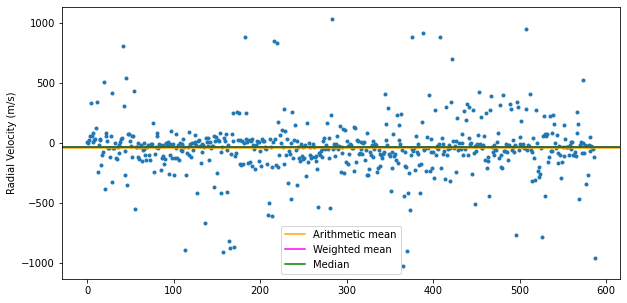

mean = -16639.78294 m/s ; standard deviation / √N = 9.46578 m/s
weighted mean = -16634.26173 m/s ; weighted standard deviation / √N = 0.58868 m/s
median = -16635.68545 m/s


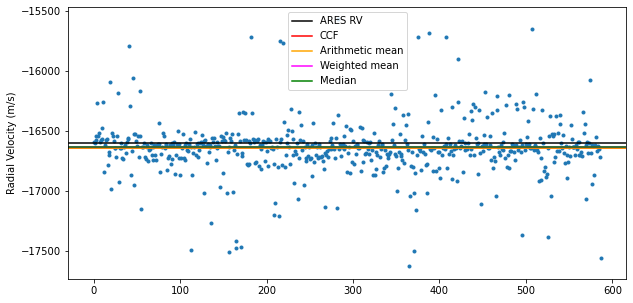

In [6]:
corr2RV = np.zeros(0)
corr2_uncert = np.zeros(0)

for i , rv in enumerate(corrRV): # this cycle chooses the values between the mean and standard deviation
    if corr_mean - 2*corr_std < rv < corr_mean + 2*corr_std:
        corr2RV = np.append(corr2RV,rv)
        corr2_uncert = np.append(corr2_uncert,corr_uncert[i])
        
corr2_mean = np.mean(corr2RV)
corr2_std = np.std(corr2RV)

corr2_wmean = corr2_mean
corr2_wstd = 0
f0 = 2e-3
sigma = (corr2RV - corr2_wmean) / corr2_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    corr2_wmean = (corr2RV * pi * corr2_uncert ** (-2)).sum() / (pi * corr2_uncert ** (-2)).sum()
    corr2_wstd = np.sqrt(1 / (pi * corr2_uncert ** (-2)).sum())
    sigma = (corr2RV - corr2_wmean) / corr2_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
corr2_median = np.median(corr2RV)

N_229 = len(corr2RV)
mean_229 = corr2_mean
std_229 = corr2_std
wmean_229 = corr2_wmean
wstd_229 = corr2_wstd
median_229 = corr2_median

N_dim_229[2] = len(corr2RV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median))

plt.plot(corr2RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr2_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean + ARES_RV,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean + ARES_RV,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median + ARES_RV))

Matrix = np.zeros([4,5])
Matrix[0,0] = corr2_mean + ARES_RV
Matrix[0,1] = corr2_std / np.sqrt(len(corr2RV))
Matrix[0,2] = corr2_wmean + ARES_RV
Matrix[0,3] = corr2_wstd / np.sqrt(len(corr2RV))
Matrix[0,4] = corr2_median + ARES_RV

plt.plot(corr2RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(corr2_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

# 595

In [7]:
RV_595 = np.zeros(0)
uncert_595 = np.zeros(0)

for i, c in enumerate(contrast):
    if c >= 0.35:
        RV_595 = np.append(RV_595,RV[i])
        uncert_595 = np.append(uncert_595,uncert[i])
    else:
        pass
    
N_dim_595 = np.zeros(3,dtype=int)
N_dim_595[0] = len(RV_595)

mean = 151.96402 m/s ; standard deviation / √N = 30.00117 m/s
weighted mean = -20.97509 m/s ; weighted standard deviation / √N = 0.18347 m/s
median = -22.69666 m/s


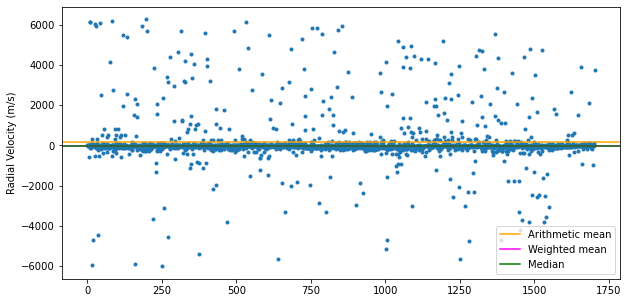

mean = -16448.03598 m/s ; standard deviation / √N = 30.00117 m/s
weighted mean = -16620.97509 m/s ; weighted standard deviation / √N = 0.18347 m/s
median = -16622.69666 m/s


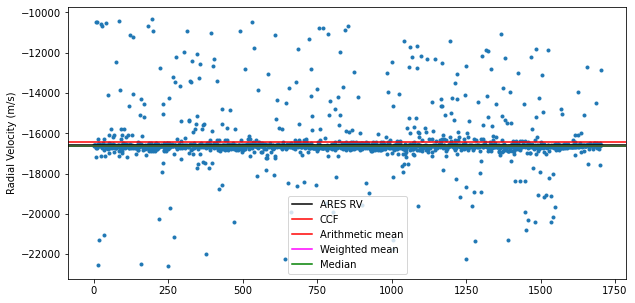

In [8]:
std = np.std(RV_595) # standard deviation of the values of the RVs
mean = np.mean(RV_595) # mean of the values of the RVs

wmean = mean
wstd = 0
f0 = 2e-3
sigma = (RV_595 - wmean) / uncert_595
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    wmean = (RV_595 * pi * uncert_595 ** (-2)).sum() / (pi * uncert_595 ** (-2)).sum()
    wstd = np.sqrt(1 / (pi * uncert_595 ** (-2)).sum())
    sigma = (RV_595 - wmean) / uncert_595
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
median = np.median(RV_595) # median of the values of the RVs

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean,std / np.sqrt(len(RV_595))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean,wstd / np.sqrt(len(RV_595))))
print('median = {:.5f} m/s'.format(median))

plt.plot(RV_595,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean + ARES_RV,std / np.sqrt(len(RV_595))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean + ARES_RV,wstd / np.sqrt(len(RV_595))))
print('median = {:.5f} m/s'.format(median + ARES_RV))

plt.plot(RV_595 + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(mean + ARES_RV, label= 'Arithmetic mean', color ='red')
plt.axhline(wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Removing outliers

mean = 18.15718 m/s ; standard deviation / √N = 11.78504 m/s
weighted mean = -33.90421 m/s ; weighted standard deviation / √N = 0.18980 m/s
median = -25.71439 m/s


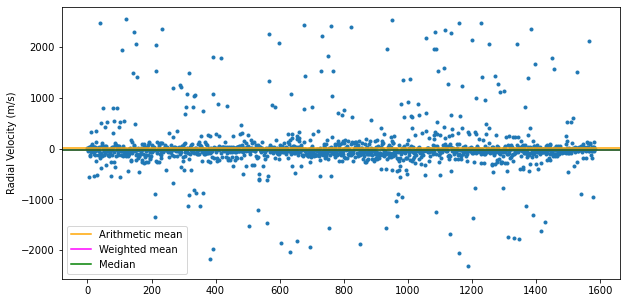

mean = -16581.84282 m/s ; standard deviation / √N = 11.78504 m/s
weighted mean = -16633.90421 m/s ; weighted standard deviation / √N = 0.18980 m/s
median = -16625.71439 m/s


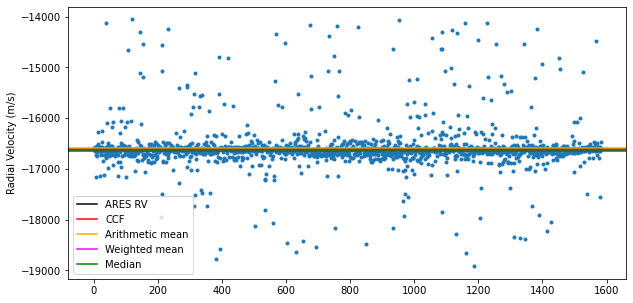

In [9]:
corrRV = np.zeros(0)
corr_uncert = np.zeros(0)

for i , rv in enumerate(RV_595): # this cycle chooses the values between the mean and standard deviation
    if mean - 2*std < rv < mean + 2*std:
        corrRV = np.append(corrRV,rv)
        corr_uncert = np.append(corr_uncert,uncert_595[i])
        
corr_mean = np.mean(corrRV)
corr_std = np.std(corrRV)

corr_wmean = corr_mean
corr_wstd = 0
f0 = 2e-3
sigma = (corrRV - corr_wmean) / corr_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    corr_wmean = (corrRV * pi * corr_uncert ** (-2)).sum() / (pi * corr_uncert ** (-2)).sum()
    corr_wstd = np.sqrt(1 / (pi * corr_uncert ** (-2)).sum())
    sigma = (corrRV - corr_wmean) / corr_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
corr_median = np.median(corrRV)

N_dim_595[1] = len(corrRV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median))

plt.plot(corrRV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean + ARES_RV,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean + ARES_RV,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median + ARES_RV))

plt.plot(corrRV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(corr_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Removing outliers (2)

mean = -24.57405 m/s ; standard deviation / √N = 4.98925 m/s
weighted mean = -26.81409 m/s ; weighted standard deviation / √N = 0.19609 m/s
median = -27.59104 m/s


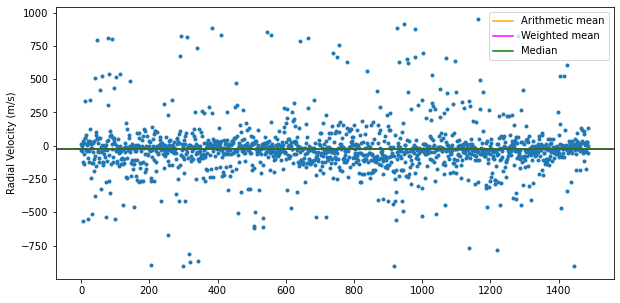

mean = -16624.57405 m/s ; standard deviation / √N = 4.98925 m/s
weighted mean = -16626.81409 m/s ; weighted standard deviation / √N = 0.19609 m/s
median = -16627.59104 m/s


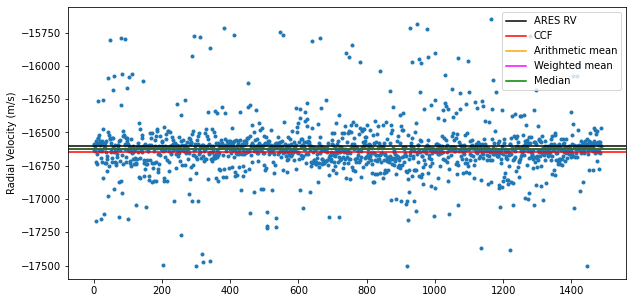

In [10]:
corr2RV = np.zeros(0)
corr2_uncert = np.zeros(0)

for i , rv in enumerate(corrRV): # this cycle chooses the values between the mean and standard deviation
    if corr_mean - 2*corr_std < rv < corr_mean + 2*corr_std:
        corr2RV = np.append(corr2RV,rv)
        corr2_uncert = np.append(corr2_uncert,corr_uncert[i])
        
corr2_mean = np.mean(corr2RV)
corr2_std = np.std(corr2RV)

corr2_wmean = corr2_mean
corr2_wstd = 0
f0 = 2e-3
sigma = (corr2RV - corr2_wmean) / corr2_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    corr2_wmean = (corr2RV * pi * corr2_uncert ** (-2)).sum() / (pi * corr2_uncert ** (-2)).sum()
    corr2_wstd = np.sqrt(1 / (pi * corr2_uncert ** (-2)).sum())
    sigma = (corr2RV - corr2_wmean) / corr2_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
corr2_median = np.median(corr2RV)

N_595 = len(corr2RV)
mean_595 = corr2_mean
std_595 = corr2_std
wmean_595 = corr2_wmean
wstd_595 = corr2_wstd
median_595 = corr2_median

N_dim_595[2] = len(corr2RV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median))

plt.plot(corr2RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr2_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean + ARES_RV,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean + ARES_RV,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median + ARES_RV))

Matrix[1,0] = corr2_mean + ARES_RV
Matrix[1,1] = corr2_std / np.sqrt(len(corr2RV))
Matrix[1,2] = corr2_wmean + ARES_RV
Matrix[1,3] = corr2_wstd / np.sqrt(len(corr2RV))
Matrix[1,4] = corr2_median + ARES_RV

plt.plot(corr2RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(corr2_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

# 1030

In [11]:
RV_1030 = np.zeros(0)
uncert_1030 = np.zeros(0)

for i, c in enumerate(contrast):
    if c >= 0.2:
        RV_1030 = np.append(RV_1030,RV[i])
        uncert_1030 = np.append(uncert_1030,uncert[i])
    else:
        pass
    
N_dim_1030 = np.zeros(3,dtype=int)
N_dim_1030[0] = len(RV_1030)

mean = 178.78716 m/s ; standard deviation / √N = 21.50990 m/s
weighted mean = -24.01219 m/s ; weighted standard deviation / √N = 0.09426 m/s
median = -17.01372 m/s


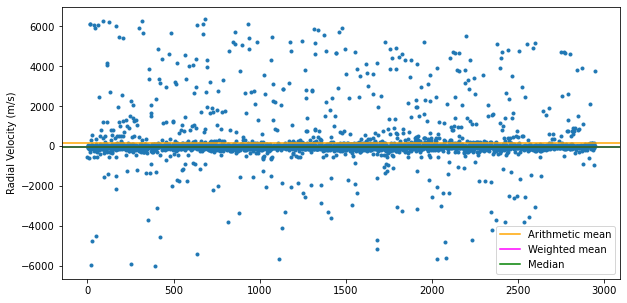

mean = -16421.21284 m/s ; standard deviation / √N = 21.50990 m/s
weighted mean = -16624.01219 m/s ; weighted standard deviation / √N = 0.09426 m/s
median = -16617.01372 m/s


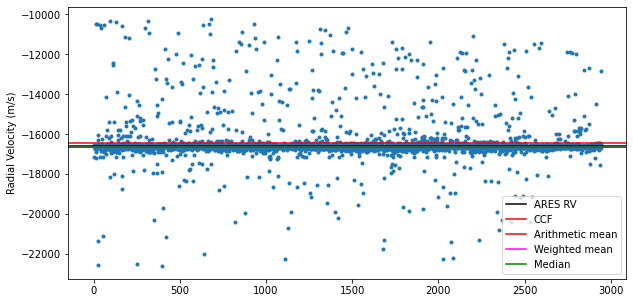

In [12]:
std = np.std(RV_1030) # standard deviation of the values of the RVs
mean = np.mean(RV_1030) # mean of the values of the RVs

wmean = mean
wstd = 0
f0 = 2e-3
sigma = (RV_1030 - wmean) / uncert_1030
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    wmean = (RV_1030 * pi * uncert_1030 ** (-2)).sum() / (pi * uncert_1030 ** (-2)).sum()
    wstd = np.sqrt(1 / (pi * uncert_1030 ** (-2)).sum())
    sigma = (RV_1030 - wmean) / uncert_1030
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
median = np.median(RV_1030) # median of the values of the RVs

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean,std / np.sqrt(len(RV_1030))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean,wstd / np.sqrt(len(RV_1030))))
print('median = {:.5f} m/s'.format(median))

plt.plot(RV_1030,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean + ARES_RV,std / np.sqrt(len(RV_1030))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean + ARES_RV,wstd / np.sqrt(len(RV_1030))))
print('median = {:.5f} m/s'.format(median + ARES_RV))

plt.plot(RV_1030 + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(mean + ARES_RV, label= 'Arithmetic mean', color ='red')
plt.axhline(wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Removing outliers

mean = 21.98935 m/s ; standard deviation / √N = 8.19132 m/s
weighted mean = -21.82272 m/s ; weighted standard deviation / √N = 0.09792 m/s
median = -20.22694 m/s


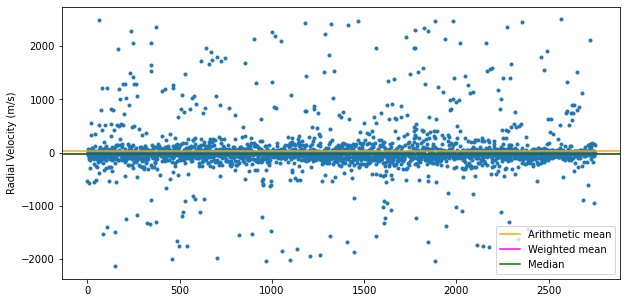

mean = -16578.01065 m/s ; standard deviation / √N = 8.19132 m/s
weighted mean = -16621.82272 m/s ; weighted standard deviation / √N = 0.09792 m/s
median = -16620.22694 m/s


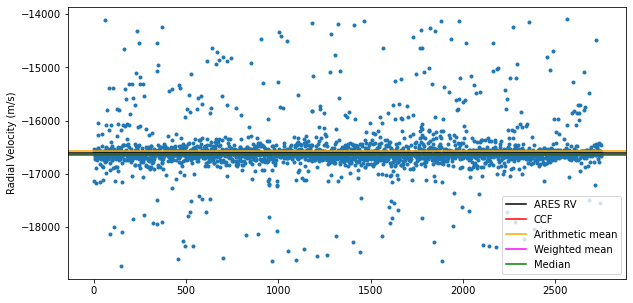

In [13]:
corrRV = np.zeros(0)
corr_uncert = np.zeros(0)

for i , rv in enumerate(RV_1030): # this cycle chooses the values between the mean and standard deviation
    if mean - 2*std < rv < mean + 2*std:
        corrRV = np.append(corrRV,rv)
        corr_uncert = np.append(corr_uncert,uncert_1030[i])
        
corr_mean = np.mean(corrRV)
corr_std = np.std(corrRV)

corr_wmean = corr_mean
corr_wstd = 0
f0 = 2e-3
sigma = (corrRV - corr_wmean) / corr_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    corr_wmean = (corrRV * pi * corr_uncert ** (-2)).sum() / (pi * corr_uncert ** (-2)).sum()
    corr_wstd = np.sqrt(1 / (pi * corr_uncert ** (-2)).sum())
    sigma = (corrRV - corr_wmean) / corr_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
corr_median = np.median(corrRV)

N_dim_1030[1] = len(corrRV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median))

plt.plot(corrRV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean + ARES_RV,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean + ARES_RV,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median + ARES_RV))

plt.plot(corrRV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(corr_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Removing outliers (2)

mean = -11.45508 m/s ; standard deviation / √N = 3.47907 m/s
weighted mean = -18.35247 m/s ; weighted standard deviation / √N = 0.10075 m/s
median = -21.69789 m/s


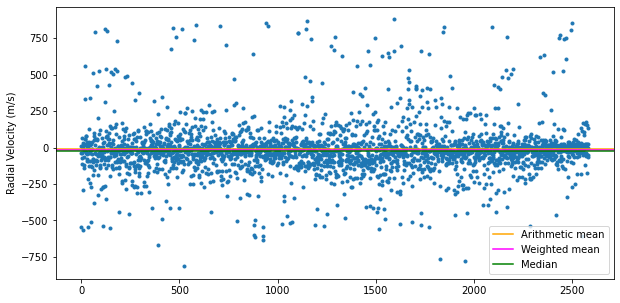

mean = -16611.45508 m/s ; standard deviation / √N = 3.47907 m/s
weighted mean = -16618.35247 m/s ; weighted standard deviation / √N = 0.10075 m/s
median = -16621.69789 m/s


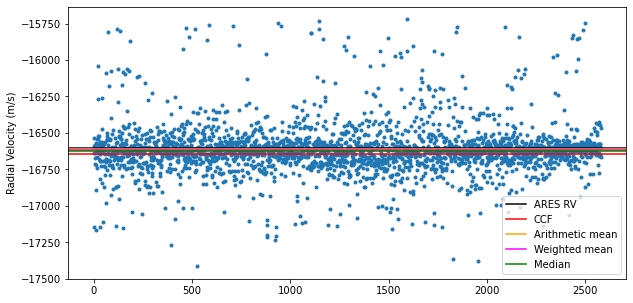

In [14]:
corr2RV = np.zeros(0)
corr2_uncert = np.zeros(0)

for i , rv in enumerate(corrRV): # this cycle chooses the values between the mean and standard deviation
    if corr_mean - 2*corr_std < rv < corr_mean + 2*corr_std:
        corr2RV = np.append(corr2RV,rv)
        corr2_uncert = np.append(corr2_uncert,corr_uncert[i])
        
corr2_mean = np.mean(corr2RV)
corr2_std = np.std(corr2RV)

corr2_wmean = corr2_mean
corr2_wstd = 0
f0 = 2e-3
sigma = (corr2RV - corr2_wmean) / corr2_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    corr2_wmean = (corr2RV * pi * corr2_uncert ** (-2)).sum() / (pi * corr2_uncert ** (-2)).sum()
    corr2_wstd = np.sqrt(1 / (pi * corr2_uncert ** (-2)).sum())
    sigma = (corr2RV - corr2_wmean) / corr2_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
corr2_median = np.median(corr2RV)

N_1030 = len(corr2RV)
mean_1030 = corr2_mean
std_1030 = corr2_std
wmean_1030 = corr2_wmean
wstd_1030 = corr2_wstd
median_1030 = corr2_median

N_dim_1030[2] = len(corr2RV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median))

plt.plot(corr2RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr2_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean + ARES_RV,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean + ARES_RV,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median + ARES_RV))

Matrix[2,0] = corr2_mean + ARES_RV
Matrix[2,1] = corr2_std / np.sqrt(len(corr2RV))
Matrix[2,2] = corr2_wmean + ARES_RV
Matrix[2,3] = corr2_wstd / np.sqrt(len(corr2RV))
Matrix[2,4] = corr2_median + ARES_RV

plt.plot(corr2RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(corr2_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

# 3741

In [6]:
RV_3741 = np.zeros(0)
uncert_3741 = np.zeros(0)

for i, c in enumerate(contrast):
    if c >= 0:
        RV_3741 = np.append(RV_3741,RV[i])
        uncert_3741 = np.append(uncert_3741,uncert[i])
    else:
        pass
    
N_dim_3741 = np.zeros(3,dtype=int)
N_dim_3741[0] = len(RV_3741)

mean = 183.60806 m/s ; standard deviation / √N = 13.04125 m/s
weighted mean = 21.07691 m/s ; weighted standard deviation / √N = 0.02094 m/s
median = -3.89693 m/s


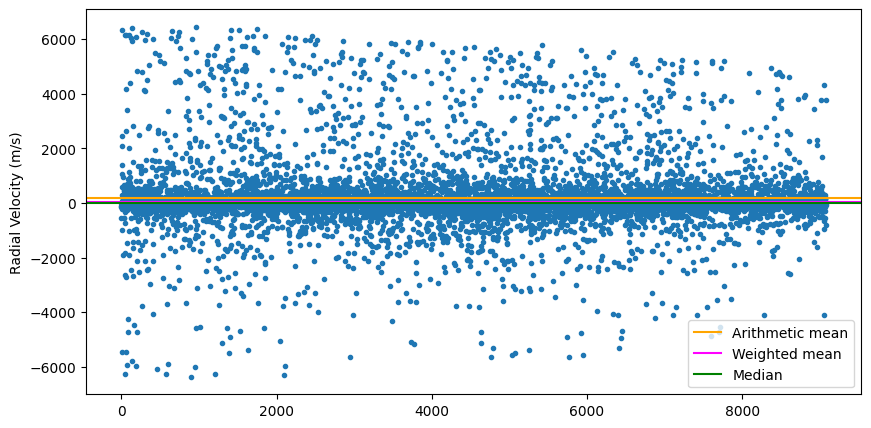

mean = -16416.39194 m/s ; standard deviation / √N = 13.04125 m/s
weighted mean = -16578.92309 m/s ; weighted standard deviation / √N = 0.02094 m/s
median = -16603.89693 m/s


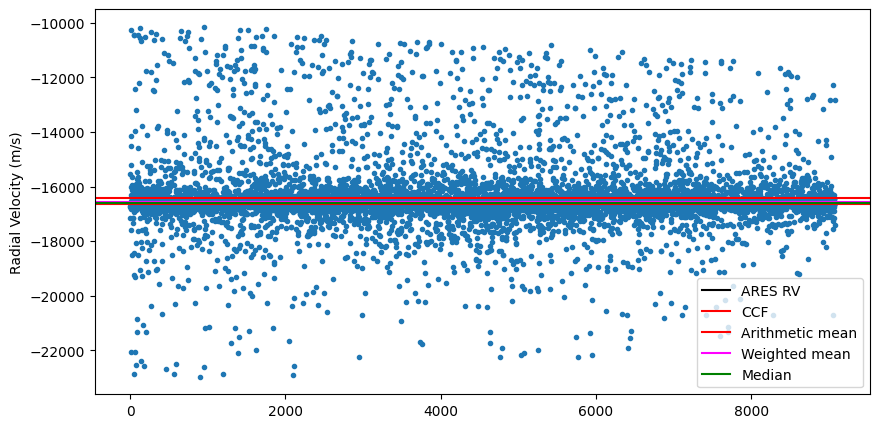

In [7]:
std = np.std(RV_3741) # standard deviation of the values of the RVs
mean = np.mean(RV_3741) # mean of the values of the RVs

wmean = mean
wstd = 0
f0 = 2e-3
sigma = (RV_3741 - wmean) / uncert_3741
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    wmean = (RV_3741 * pi * uncert_3741 ** (-2)).sum() / (pi * uncert_3741 ** (-2)).sum()
    wstd = np.sqrt(1 / (pi * uncert_3741 ** (-2)).sum())
    sigma = (RV_3741 - wmean) / uncert_3741
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
median = np.median(RV_3741) # median of the values of the RVs

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean,std / np.sqrt(len(RV_3741))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean,wstd / np.sqrt(len(RV_3741))))
print('median = {:.5f} m/s'.format(median))

plt.plot(RV_3741,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean + ARES_RV,std / np.sqrt(len(RV_3741))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean + ARES_RV,wstd / np.sqrt(len(RV_3741))))
print('median = {:.5f} m/s'.format(median + ARES_RV))

plt.plot(RV_3741 + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(mean + ARES_RV, label= 'Arithmetic mean', color ='red')
plt.axhline(wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Removing outliers

mean = 40.63644 m/s ; standard deviation / √N = 6.35953 m/s
weighted mean = 1.87948 m/s ; weighted standard deviation / √N = 0.02156 m/s
median = -9.47635 m/s


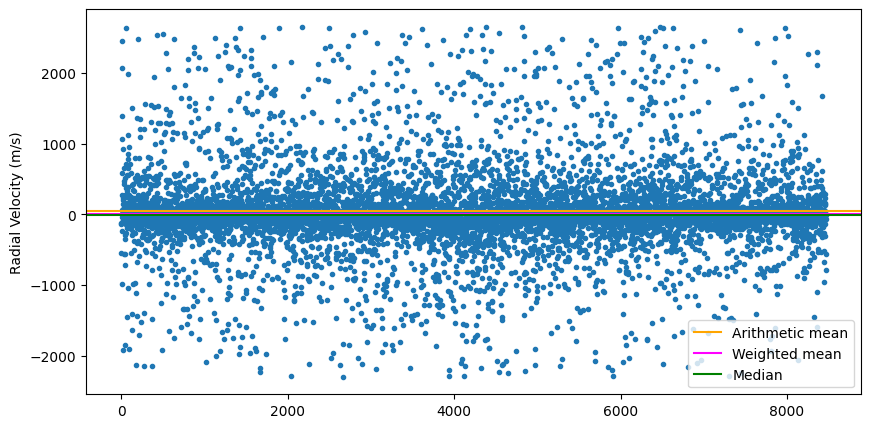

mean = -16559.36356 m/s ; standard deviation / √N = 6.35953 m/s
weighted mean = -16598.12052 m/s ; weighted standard deviation / √N = 1.98344 m/s
median = -16609.47635 m/s


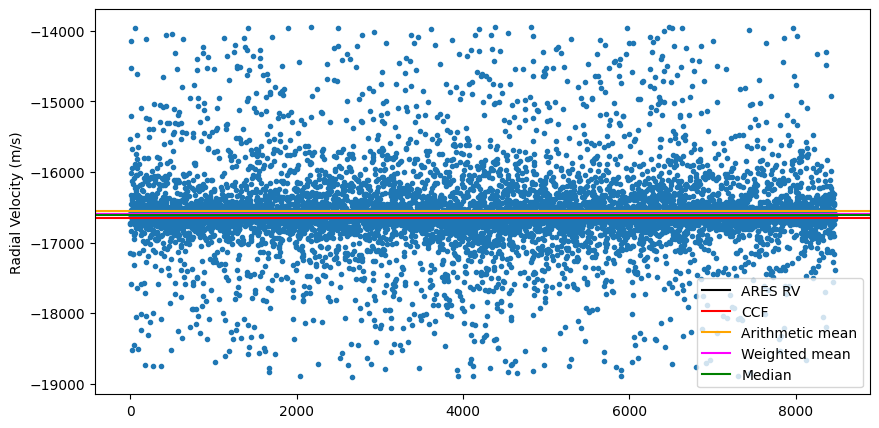

In [8]:
corrRV = np.zeros(0)
corr_uncert = np.zeros(0)

for i , rv in enumerate(RV_3741): # this cycle chooses the values between the mean and standard deviation
    if mean - 2*std < rv < mean + 2*std:
        corrRV = np.append(corrRV,rv)
        corr_uncert = np.append(corr_uncert,uncert_3741[i])
        
corr_mean = np.mean(corrRV)
corr_std = np.std(corrRV)

corr_wmean = corr_mean
corr_wstd = 0
f0 = 2e-3
sigma = (corrRV - corr_wmean) / corr_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    corr_wmean = (corrRV * pi * corr_uncert ** (-2)).sum() / (pi * corr_uncert ** (-2)).sum()
    corr_wstd = np.sqrt(1 / (pi * corr_uncert ** (-2)).sum())
    sigma = (corrRV - corr_wmean) / corr_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
corr_median = np.median(corrRV)

N_dim_3741[1] = len(corrRV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median))

plt.plot(corrRV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean + ARES_RV,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean + ARES_RV,corr_wstd))
print('median = {:.5f} m/s'.format(corr_median + ARES_RV))

plt.plot(corrRV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(corr_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

In [9]:
CCF

-16646.1

## Removing outliers (2)

mean = 8.53142 m/s ; standard deviation / √N = 3.84589 m/s
weighted mean = 59.82853 m/s ; weighted standard deviation / √N = 0.01763 m/s
median = -11.53821 m/s


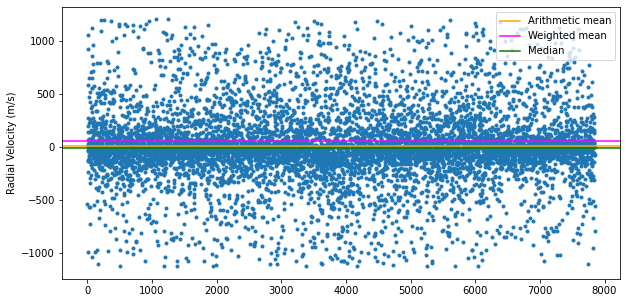

mean = -16591.46858 m/s ; standard deviation / √N = 3.84589 m/s
weighted mean = -16540.17147 m/s ; weighted standard deviation / √N = 0.01763 m/s
median = -16611.53821 m/s


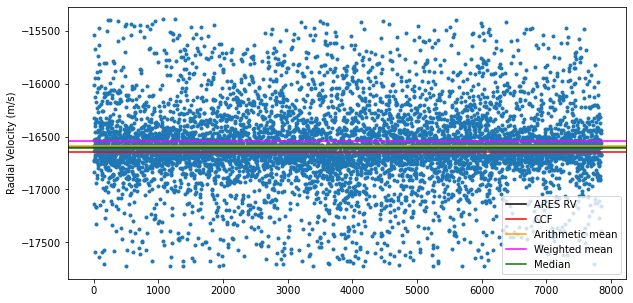

In [18]:
corr2RV = np.zeros(0)
corr2_uncert = np.zeros(0)

for i , rv in enumerate(corrRV): # this cycle chooses the values between the mean and standard deviation
    if corr_mean - 2*corr_std < rv < corr_mean + 2*corr_std:
        corr2RV = np.append(corr2RV,rv)
        corr2_uncert = np.append(corr2_uncert,corr_uncert[i])
        
corr2_mean = np.mean(corr2RV)
corr2_std = np.std(corr2RV)

corr2_wmean = corr2_mean
corr2_wstd = 0
f0 = 2e-3
sigma = (corr2RV - corr2_wmean) / corr2_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    corr2_wmean = (corr2RV * pi * corr2_uncert ** (-2)).sum() / (pi * corr2_uncert ** (-2)).sum()
    corr2_wstd = np.sqrt(1 / (pi * corr2_uncert ** (-2)).sum())
    sigma = (corr2RV - corr2_wmean) / corr2_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
corr2_median = np.median(corr2RV)

N_3741 = len(corr2RV)
mean_3741 = corr2_mean
std_3741 = corr2_std
wmean_3741 = corr2_wmean
wstd_3741 = corr2_wstd
median_3741 = corr2_median

N_dim_3741[2] = len(corr2RV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median))

plt.plot(corr2RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr2_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean + ARES_RV,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean + ARES_RV,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median + ARES_RV))

Matrix[3,0] = corr2_mean + ARES_RV
Matrix[3,1] = corr2_std / np.sqrt(len(corr2RV))
Matrix[3,2] = corr2_wmean + ARES_RV
Matrix[3,3] = corr2_wstd / np.sqrt(len(corr2RV))
Matrix[3,4] = corr2_median + ARES_RV

plt.plot(corr2RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(corr2_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

# Mean RV for a different number of initial wavelenghts

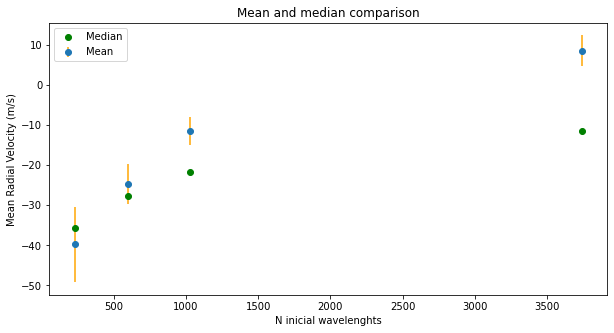

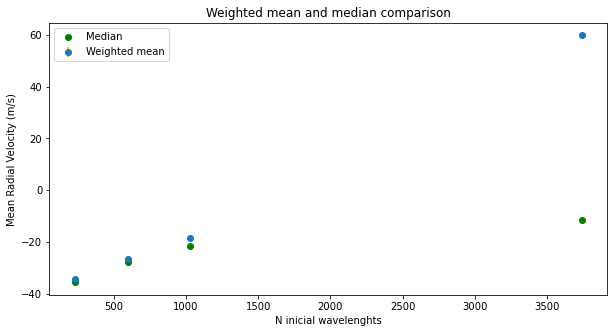

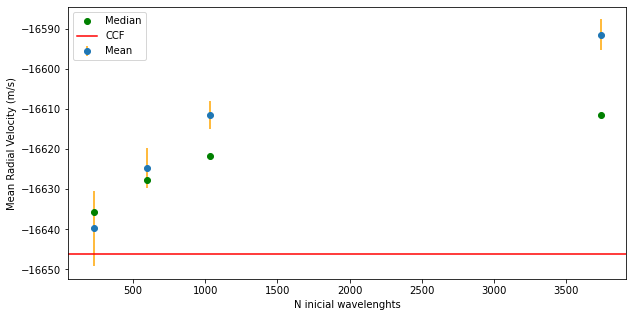

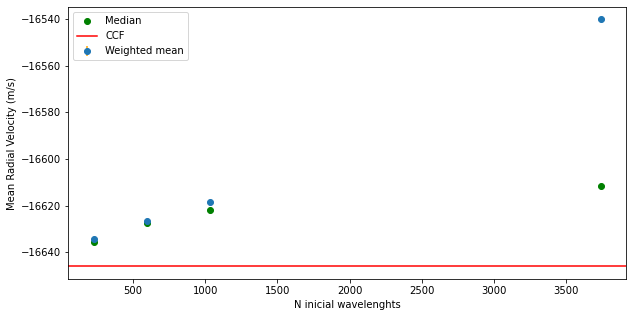

In [19]:
Means = np.array([mean_229,mean_595,mean_1030,mean_3741])
Std = np.array([std_229,std_595,std_1030,std_3741])
Wmeans = np.array([wmean_229,wmean_595,wmean_1030,wmean_3741])
Wstd = np.array([wstd_229,wstd_595,wstd_1030,wstd_3741])
Medians = np.array([median_229,median_595,median_1030,median_3741])

Std_root = np.array([std_229 / np.sqrt(N_dim_229[2]),std_595 / np.sqrt(N_dim_595[2]),std_1030 / np.sqrt(N_dim_1030[2]),std_3741 / np.sqrt(N_dim_3741[2])])
Wstd_root = np.array([wstd_229 / np.sqrt(N_dim_229[2]),wstd_595 / np.sqrt(N_dim_595[2]),wstd_1030 / np.sqrt(N_dim_1030[2]),wstd_3741 / np.sqrt(N_dim_3741[2])])

N_wave = np.array([229,595,1030,3741])

#plt.errorbar(N_wave,Means,yerr=Std,ecolor='blue',fmt='o',label='Mean')
plt.errorbar(N_wave,Means,yerr=Std_root,ecolor='orange',fmt='o',label='Mean')
plt.plot(N_wave,Medians,'o',label='Median',color='green')
plt.legend()
plt.ylabel('Mean Radial Velocity (m/s)')
plt.xlabel('N inicial wavelenghts')
plt.title('Mean and median comparison')
plt.show()

#plt.errorbar(N_wave,Wmeans,yerr=Wstd,ecolor='blue',fmt='o',label='Weighted mean')
plt.errorbar(N_wave,Wmeans,yerr=Wstd_root,ecolor='orange',fmt='o',label='Weighted mean')
plt.plot(N_wave,Medians,'o',label='Median',color='green')
plt.legend()
plt.ylabel('Mean Radial Velocity (m/s)')
plt.xlabel('N inicial wavelenghts')
plt.title('Weighted mean and median comparison')
plt.show()

#plt.errorbar(N_wave,Means+ARES_RV,yerr=Std,ecolor='blue',fmt='o',label='Mean')
plt.errorbar(N_wave,Means+ARES_RV,yerr=Std_root,ecolor='orange',fmt='o',label='Mean')
plt.plot(N_wave,Medians+ARES_RV,'o',label='Median',color='green')
plt.ylabel('Mean Radial Velocity (m/s)')
plt.xlabel('N inicial wavelenghts')
#plt.axhline(ARES_RV,label='ARES RV',color='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.legend()
plt.show()

#plt.errorbar(N_wave,Wmeans+ARES_RV,yerr=Wstd,ecolor='blue',fmt='o',label='Weighted mean')
plt.errorbar(N_wave,Wmeans+ARES_RV,yerr=Wstd_root,ecolor='orange',fmt='o',label='Weighted mean')
plt.plot(N_wave,Medians+ARES_RV,'o',label='Median',color='green')
plt.ylabel('Mean Radial Velocity (m/s)')
plt.xlabel('N inicial wavelenghts')
#plt.axhline(ARES_RV,label='ARES RV',color='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.legend()
plt.show()

# Percentage of wavelenght decrease

   N ref lines  N fitted lines  1st removal      1st %  2nd removal      2nd %
0          229             692          634  91.618497          588  84.971098
1          595            1704         1584  92.957746         1488  87.323944
2         1030            2945         2750  93.378608         2583  87.707980
3         3741            9077         8467  93.279718         7849  86.471301


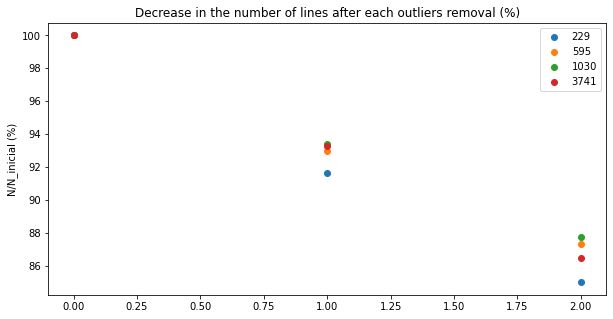

In [20]:
data = {
    'N ref lines':[229,595,1030,3741],
    'N fitted lines':[N_dim_229[0],N_dim_595[0],N_dim_1030[0],N_dim_3741[0]],
    '1st removal':[N_dim_229[1],N_dim_595[1],N_dim_1030[1],N_dim_3741[1]],
    '1st %':[N_dim_229[1]/N_dim_229[0]*100,N_dim_595[1]/N_dim_595[0]*100,N_dim_1030[1]/N_dim_1030[0]*100,N_dim_3741[1]/N_dim_3741[0]*100],
    '2nd removal':[N_dim_229[2],N_dim_595[2],N_dim_1030[2],N_dim_3741[2]],
    '2nd %':[N_dim_229[2]/N_dim_229[0]*100,N_dim_595[2]/N_dim_595[0]*100,N_dim_1030[2]/N_dim_1030[0]*100,N_dim_3741[2]/N_dim_3741[0]*100]
}

# Create a DataFrame (table) from the data
df = pd.DataFrame(data)

# Display the table
print(df)

N_dim_229_per = np.array([1,N_dim_229[1] / N_dim_229[0],N_dim_229[2] / N_dim_229[0]])*100
N_dim_595_per = np.array([1,N_dim_595[1] / N_dim_595[0],N_dim_595[2] / N_dim_595[0]])*100
N_dim_1030_per = np.array([1,N_dim_1030[1] / N_dim_1030[0],N_dim_1030[2] / N_dim_1030[0]])*100
N_dim_3741_per = np.array([1,N_dim_3741[1] / N_dim_3741[0],N_dim_3741[2] / N_dim_3741[0]])*100


plt.plot(N_dim_229_per,'o',label='229')
plt.plot(N_dim_595_per,'o',label='595')
plt.plot(N_dim_1030_per,'o',label='1030')
plt.plot(N_dim_3741_per,'o',label='3741')
plt.legend()
plt.title('Decrease in the number of lines after each outliers removal (%)')
plt.ylabel('N/N_inicial (%)')
plt.show()

# Histograms of the error

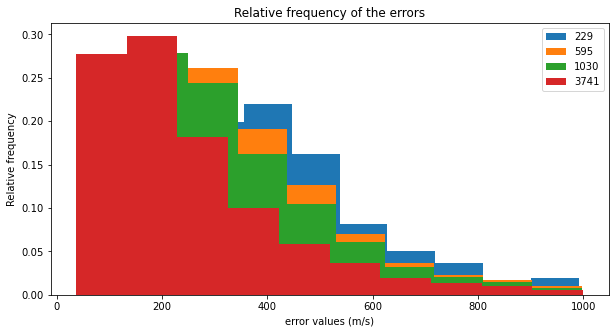

In [21]:
new_uncert_229 = [x for x in uncert_229 if x < 1e3]
plt.hist(new_uncert_229,weights=np.zeros_like(new_uncert_229) + 1. / len(new_uncert_229),label='229')

new_uncert_595 = [x for x in uncert_595 if x < 1e3]
plt.hist(new_uncert_595,weights=np.zeros_like(new_uncert_595) + 1. / len(new_uncert_595),label='595')

new_uncert_1030 = [x for x in uncert_1030 if x < 1e3]
plt.hist(new_uncert_1030,weights=np.zeros_like(new_uncert_1030) + 1. / len(new_uncert_1030),label='1030')

new_uncert_3741 = [x for x in uncert_3741 if x < 1e3]
plt.hist(new_uncert_3741,weights=np.zeros_like(new_uncert_3741) + 1. / len(new_uncert_3741),label='3741')

plt.title('Relative frequency of the errors')
plt.xlabel('error values (m/s)')
plt.ylabel('Relative frequency')
plt.legend()
plt.show()

In [22]:
np.savetxt('values_5.txt',Matrix)